In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Regression for race and polling site by county

In [2]:
race =  pd.read_csv('data/race_county_data/cleaned_georgia_race_county.csv', index_col = 0)
polling_site = pd.read_csv('data/polling_site_data/2020_clean_county_densities.csv', index_col = 0)

In [13]:
race.head()

(159, 15)


In [ ]:
polling_site.head()

Checking the number of rows to 

In [14]:
print(race.shape)
print(polling_site.shape)

(159, 15)
(159, 4)


Since the county names in the race data are have 'County, Georgia' while the polling site data only has the county name, this part of the string is removed and all data is converted to titles.

In [9]:
race['Area Name'] = race['Area Name'].str.replace(' County, Georgia','')
race['Area Name'] = race['Area Name'].str.title()

polling_site['Area Name'] = polling_site['Area Name'].str.title()

In [10]:
merge = pd.merge(race, polling_site, how="inner", left_on=['Area Name'], right_on=['County'])

In [12]:
print(merge.shape)

(159, 19)


In [4]:
test = race.merge(polling_sites, on='County', how='inner')
test.head()

,County,id,Total_x,Hispanic,White,Black,Asian,Mixed,Others,Population Density:Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Number of polling sites,Total_y,Polling Site Density
0,Appling,0500000US13001,18444,1825,12674,3339,123,417,66,0.098948,0.687161,0.181034,0.006669,0.022609,0.003578,9,18444,0.000488
1,Atkinson,0500000US13003,8286,2048,4801,1208,12,167,50,0.247164,0.579411,0.145788,0.001448,0.020154,0.006034,4,8286,0.000483
2,Bacon,0500000US13005,11140,875,8103,1747,40,335,40,0.078546,0.727379,0.156822,0.003591,0.030072,0.003591,1,11140,0.000090
3,Baker,0500000US13007,2876,143,1514,1128,18,70,3,0.049722,0.526426,0.392211,0.006259,0.024339,0.001043,5,2876,0.001739
4,Baldwin,0500000US13009,43799,1139,22432,18318,599,1027,284,0.026005,0.512158,0.418229,0.013676,0.023448,0.006484,14,43799,0.000320


<AxesSubplot:xlabel='Population Density: White', ylabel='Polling Site Density'>

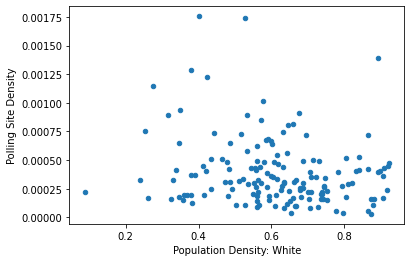

In [5]:
test.plot.scatter(x='Population Density: White', y='Polling Site Density')

<AxesSubplot:xlabel='Population Density: Black', ylabel='Polling Site Density'>

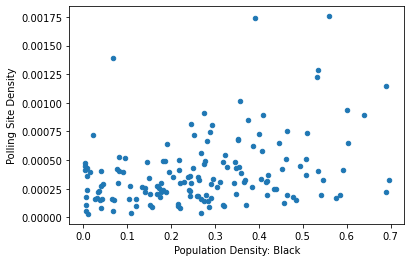

In [6]:
test.plot.scatter(x='Population Density: Black', y='Polling Site Density')

In [7]:
test.corr(method= 'pearson', min_periods=1)

,Total_x,Hispanic,White,Black,Asian,Mixed,Others,Population Density:Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Number of polling sites,Total_y,Polling Site Density
Total_x,1.000000,0.891610,0.952363,0.925563,0.895274,0.989869,0.982836,0.296641,-0.263503,0.057202,0.687480,0.247177,0.335905,0.912051,1.000000,-0.224893
Hispanic,0.891610,1.000000,0.817225,0.740477,0.919329,0.873726,0.890362,0.424899,-0.238657,-0.000240,0.660609,0.158614,0.263582,0.693399,0.891610,-0.180926
White,0.952363,0.817225,1.000000,0.800460,0.803020,0.969714,0.941974,0.300528,-0.109772,-0.098338,0.682059,0.346688,0.355856,0.848205,0.952363,-0.283056
Black,0.925563,0.740477,0.800460,1.000000,0.782450,0.892566,0.897181,0.187249,-0.409255,0.257646,0.544573,0.147650,0.302583,0.933421,0.925563,-0.157694
Asian,0.895274,0.919329,0.803020,0.782450,1.000000,0.864897,0.867613,0.258278,-0.216951,0.023585,0.772381,0.125457,0.214164,0.773071,0.895274,-0.126511
Mixed,0.989869,0.873726,0.969714,0.892566,0.864897,1.000000,0.991563,0.282198,-0.231556,0.028106,0.676620,0.310715,0.377272,0.886282,0.989869,-0.233215
Others,0.982836,0.890362,0.941974,0.897181,0.867613,0.991563,1.000000,0.283257,-0.269559,0.068679,0.660873,0.269244,0.382703,0.867767,0.982836,-0.208890
Population Density:Hispanic,0.296641,0.424899,0.300528,0.187249,0.258278,0.282198,0.283257,1.000000,-0.144878,-0.236923,0.296769,0.106981,0.285897,0.175777,0.296641,-0.274781
Population Density: White,-0.263503,-0.238657,-0.109772,-0.409255,-0.216951,-0.231556,-0.269559,-0.144878,1.000000,-0.916141,-0.186313,0.325652,-0.086328,-0.244667,-0.263503,-0.197600
Population Density: Black,0.057202,-0.000240,-0.098338,0.257646,0.023585,0.028106,0.068679,-0.236923,-0.916141,1.000000,-0.055686,-0.450300,-0.105464,0.105772,0.057202,0.341283
